### Genetic algorithms, continued

Now use GA to solve a 0-1 knapsack (burglar) problem.

In [2]:
import numpy as np
from random import sample
import matplotlib.pyplot as plt

In [3]:
# initialize objects to steal (values and weights) and the bag capacity
objects = []
for i in range(100):
    weight = np.random.randint(1,101)
    rand_exponent = np.random.choice([1,1.2,1.6,2], 1, p=[0.75, 0.18,0.05,0.02])
    value = max(0,np.random.normal(8*weight,2*weight)**rand_exponent)
    objects.append((weight,round(value[0])))

# collect the weights
weights = np.array([_[0] for _ in objects])
# collect the values
values = np.array([_[1] for _ in objects])
# set the bag capacity
bag_capacity = 2000

In [6]:
def init_pop(pop_size,genome_len):
    ''' accepts: pop_size = population size
                 genome_len = the length of each genome
        returns: a list of critter genomes
    '''
    return([np.random.randint(0,2,genome_len) for i in range(pop_size)])

In [7]:
def fitness(critter):
    ''' accepts: critter = a critter (with a genome)
        returns: the fitness of the critter
    '''
    # if the weight exceeds the bag capacity, solution is impossible --> 0 fitness
    if sum(weights[np.where(critter==1)]) > bag_capacity:
        return(0)
    else:
        return(sum(values[np.where(critter==1)]))

In [9]:
pop = init_pop(100,100)
[fitness(x) for x in pop]

Looks like most of our initialized population has 0 fitness. How to fix?

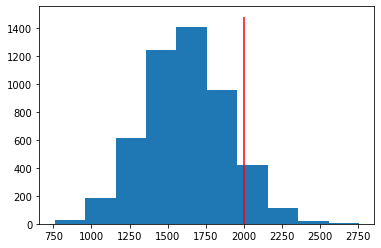

In [16]:
p_zero = 0.67
data = []
for i in range(5000):
    x = np.random.choice(2,100,p=[p_zero,1-p_zero])
    data.append(sum(weights[x==1]))
fig,ax = plt.subplots()
ax.hist(data)
ymax = ax.get_ylim()[1]
plt.vlines([2000],0,ymax,color='red');

In [17]:
def init_pop(pop_size,genome_len):
    ''' accepts: pop_size = population size
                 genome_len = the length of each genome
        returns: a list of critter genomes
    '''
    return([np.random.choice(2,100,p=[0.67,0.33]) for i in range(pop_size)])

In [18]:
def tourn(pop,tourn_size):
    ''' accepts: pop = a population
                 tourn_size = number of critters per tournament
        returns: the index of tournament winner
    '''
    selection = sample(range(len(pop)),tourn_size)
    fittest = selection[0]
    for idx in selection[1:]:
        if fitness(pop[idx])>fitness(pop[fittest]):
            fittest = idx
    return(fittest)

In [19]:
def breed(pop,idx1,idx2,mut_prob,copyover_prob):
    ''' accepts: pop = a population
                 idx1 = index of first critter to breed
                 idx2 = index of second critter to breed
                 mut_prob = in mutation, probability each bit is flipped
                 copyover_prob = probility parents copy unchanged into next gen
        returns: [offspring1, offspring2] = two offspring (with mutation)
    '''
    if np.random.uniform(0,1) < copyover_prob:
        return(pop[idx1],pop[idx2])
    genome_len = len(pop[0]) # get length of each genome
    split_pos = np.random.randint(1,genome_len) # where to split the genomes
    offspring1 = list(pop[idx1])[:split_pos]+list(pop[idx2])[split_pos:]
    offspring1 = np.array(offspring1)
    offspring2 = list(pop[idx2])[:split_pos]+list(pop[idx1])[split_pos:]
    offspring2 = np.array(offspring2)
    # mutate the offspring
    for critter in [offspring1,offspring2]:
        for i in range(len(critter)):
            if np.random.uniform(0,1) < mut_prob:
                critter[i] = 1-critter[i]
    return(offspring1,offspring2)

# again, one should investigate this to make sure it works as intended

In [20]:
# create new generation function
def next_gen(pop,tourn_size,mut_prob,copyover_prob):
    next_gen = []
    while len(next_gen)<len(pop)-2: # save two spots for elitism
        winner1 = tourn(pop,tourn_size)
        winner2 = tourn(pop,tourn_size)
        next_gen += breed(pop,winner1,winner2,mut_prob,copyover_prob)
    # implement elitism
    pop.sort(key = lambda crit:fitness(crit),reverse = True)
    next_gen += pop[:2]
    return(next_gen)

In [21]:
def best(pop):
    best_genome = pop[0]
    best_fitness = fitness(pop[0])
    for crit in pop[1:]:
        if fitness(crit) > best_fitness:
            best_fitness = fitness(crit)
            best_genome = crit
    return(best_genome,best_fitness)

In [25]:
max_generations = 5000 # max number of generations before quit
max_improvement_counter = 500 # max number of generations without improvement before quit
pop_size = 200
genome_len = 100
tourn_size = 10
mut_prob = 1/genome_len
copyover_prob = 0.1

In [26]:
generation_count = 0 # counts how many generations have elapsed
improvement_counter = 0 # counts how long since the last improvement in best_fitness

pop = init_pop(pop_size,genome_len)
# initialize best_fitness; it will be recomputed each generation
(best_genome, best_fitness) = best(pop)

while generation_count < max_generations:
    if generation_count>0:# in [10**k for k in range(10)]:
        print(f'gen: {generation_count}, best: {best_fitness}')
    improvement_counter += 1
    generation_count += 1
    pop = next_gen(pop,tourn_size,mut_prob,copyover_prob)
    (best_genome_current, best_fitness_current) = best(pop)
    if best_fitness_current > best_fitness:
        best_fitness = best_fitness_current
        best_genome = best_genome_current
        improvement_counter = 0
    if improvement_counter > max_improvement_counter or generation_count > max_generations:
        break

gen: 1, best: 250115
gen: 2, best: 252936
gen: 3, best: 254254
gen: 4, best: 256559
gen: 5, best: 257802
gen: 6, best: 258617
gen: 7, best: 259224
gen: 8, best: 260287
gen: 9, best: 261161
gen: 10, best: 261180
gen: 11, best: 262144
gen: 12, best: 262265
gen: 13, best: 262523
gen: 14, best: 262604
gen: 15, best: 262706
gen: 16, best: 262706
gen: 17, best: 262713
gen: 18, best: 262713
gen: 19, best: 262731
gen: 20, best: 262853
gen: 21, best: 262853
gen: 22, best: 262853
gen: 23, best: 263119
gen: 24, best: 263119
gen: 25, best: 263119
gen: 26, best: 263204
gen: 27, best: 263211
gen: 28, best: 263211
gen: 29, best: 263253
gen: 30, best: 263253
gen: 31, best: 263253
gen: 32, best: 263253
gen: 33, best: 263253
gen: 34, best: 263253
gen: 35, best: 263253
gen: 36, best: 263253
gen: 37, best: 263266
gen: 38, best: 263266
gen: 39, best: 263266
gen: 40, best: 263435
gen: 41, best: 263435
gen: 42, best: 263435
gen: 43, best: 263435
gen: 44, best: 263445
gen: 45, best: 263466
gen: 46, best: 2634

gen: 363, best: 263925
gen: 364, best: 263925
gen: 365, best: 263925
gen: 366, best: 263925
gen: 367, best: 263925
gen: 368, best: 263925
gen: 369, best: 263925
gen: 370, best: 263925
gen: 371, best: 263925
gen: 372, best: 263925
gen: 373, best: 263925
gen: 374, best: 263925
gen: 375, best: 263925
gen: 376, best: 263925
gen: 377, best: 263925
gen: 378, best: 263925
gen: 379, best: 263925
gen: 380, best: 263925
gen: 381, best: 263925
gen: 382, best: 263925
gen: 383, best: 263925
gen: 384, best: 263925
gen: 385, best: 263925
gen: 386, best: 263925
gen: 387, best: 263925
gen: 388, best: 263925
gen: 389, best: 263925
gen: 390, best: 263925
gen: 391, best: 263925
gen: 392, best: 263925
gen: 393, best: 263925
gen: 394, best: 263925
gen: 395, best: 263925
gen: 396, best: 263925
gen: 397, best: 263925
gen: 398, best: 263925
gen: 399, best: 263925
gen: 400, best: 263925
gen: 401, best: 263925
gen: 402, best: 263925
gen: 403, best: 263925
gen: 404, best: 263925
gen: 405, best: 263925
gen: 406, b

gen: 721, best: 264091
gen: 722, best: 264091
gen: 723, best: 264091
gen: 724, best: 264091
gen: 725, best: 264091
gen: 726, best: 264091
gen: 727, best: 264091
gen: 728, best: 264091
gen: 729, best: 264105
gen: 730, best: 264105
gen: 731, best: 264105
gen: 732, best: 264105
gen: 733, best: 264105
gen: 734, best: 264105
gen: 735, best: 264105
gen: 736, best: 264105
gen: 737, best: 264105
gen: 738, best: 264105
gen: 739, best: 264105
gen: 740, best: 264105
gen: 741, best: 264105
gen: 742, best: 264105
gen: 743, best: 264105
gen: 744, best: 264105
gen: 745, best: 264105
gen: 746, best: 264105
gen: 747, best: 264105
gen: 748, best: 264105
gen: 749, best: 264105
gen: 750, best: 264105
gen: 751, best: 264105
gen: 752, best: 264105
gen: 753, best: 264105
gen: 754, best: 264105
gen: 755, best: 264105
gen: 756, best: 264105
gen: 757, best: 264105
gen: 758, best: 264105
gen: 759, best: 264105
gen: 760, best: 264105
gen: 761, best: 264105
gen: 762, best: 264105
gen: 763, best: 264105
gen: 764, b

gen: 1075, best: 264105
gen: 1076, best: 264105
gen: 1077, best: 264105
gen: 1078, best: 264105
gen: 1079, best: 264105
gen: 1080, best: 264105
gen: 1081, best: 264105
gen: 1082, best: 264105
gen: 1083, best: 264105
gen: 1084, best: 264105
gen: 1085, best: 264105
gen: 1086, best: 264105
gen: 1087, best: 264105
gen: 1088, best: 264105
gen: 1089, best: 264105
gen: 1090, best: 264105
gen: 1091, best: 264105
gen: 1092, best: 264105
gen: 1093, best: 264105
gen: 1094, best: 264105
gen: 1095, best: 264105
gen: 1096, best: 264105
gen: 1097, best: 264105
gen: 1098, best: 264105
gen: 1099, best: 264105
gen: 1100, best: 264105
gen: 1101, best: 264105
gen: 1102, best: 264105
gen: 1103, best: 264105
gen: 1104, best: 264105
gen: 1105, best: 264105
gen: 1106, best: 264105
gen: 1107, best: 264105
gen: 1108, best: 264105
gen: 1109, best: 264105
gen: 1110, best: 264105
gen: 1111, best: 264105
gen: 1112, best: 264105
gen: 1113, best: 264105
gen: 1114, best: 264105
gen: 1115, best: 264105
gen: 1116, best:

In [27]:
best_genome

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

Let's see how our evolved solution compares to a statistics on a random draw.

In [28]:
data = []
for i in range(100000):
    x = np.random.choice(2,100,p=[0.67,0.33])
    if sum(weights[x==1]) < bag_capacity:
        data.append(sum(values[x==1]))

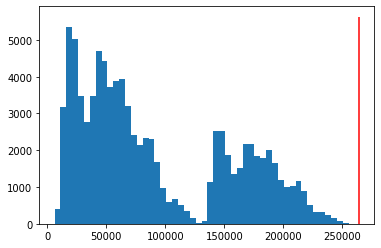

In [29]:
fig,ax = plt.subplots()
ax.hist(data,bins = 50)
ymax = ax.get_ylim()[1]
plt.vlines([best_fitness],0,ymax,color='red');

In [30]:
max(data)

255313

How many generations did it take for our genetic alg to beat the best of 100000 randomly drawn solutions?